# Using 3 Standard Deviation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


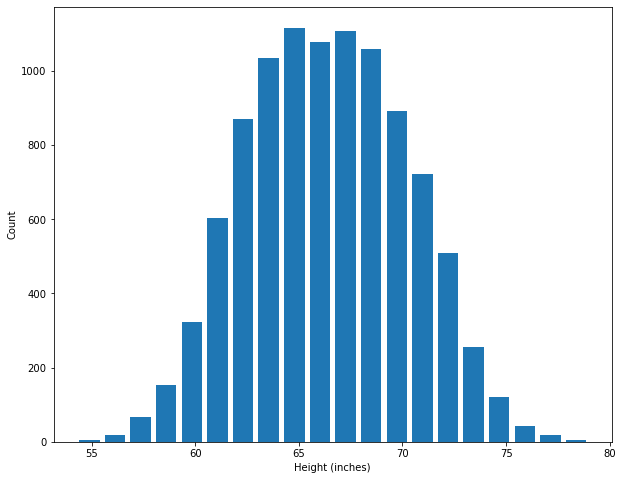

In [3]:
#plotting Height column using the histogram
plt.figure(figsize = (10, 8))
plt.hist(df.Height, bins = 20, rwidth = 0.8)  #bins defines how many bars you want to show in the chart
#rwidth defines the width of the bars
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

- This data is following a normal distribution. The normal distribution has mean = median = mode. It is symmetry about the center. 50% of values less than the mean and 50% greater than the mean.
- If the dataset is normally distributed, then 68% of values are within 1 standard deviation of the mean. 95% of values are within 2 standard deviations of the mean. 99.7% of values are within 3 standard deviations of the mean.
- Generally Upto 3 standard deviation is the common practice in the industry to remove the outliers. Sometimes people use 4, 5 standard deviations. If the dataset is small then 2 standard deviations can be used.

In [4]:
#minimum height
df.Height.min()

54.2631333250971

In [5]:
#maximum height
df.Height.max()

78.99874234638959

In [6]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

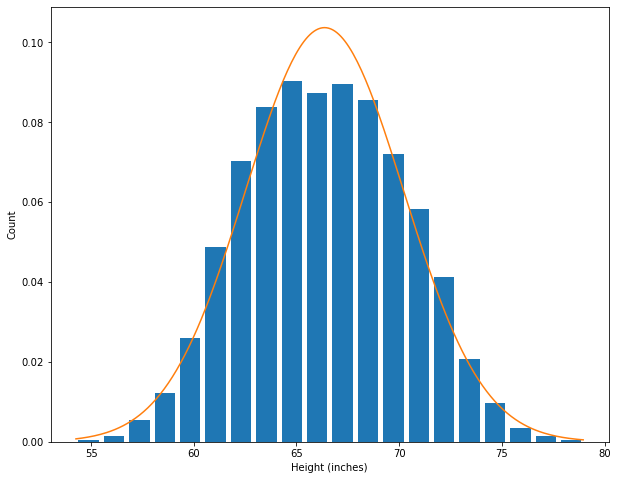

In [7]:
#plotting a bell curve for visualization purpose
from scipy.stats import norm

plt.figure(figsize = (10, 8))
plt.hist(df.Height, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

#range of height
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

In [8]:
#mean height
df.Height.mean()

66.36755975482106

In [9]:
#standard deviation
df.Height.std()

3.847528120773233

- Standard deviation shows you how far away the data point from mean value.

In [10]:
#upto 3 standard deviation generally the limit is used

#upper limit of the data
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714076

- Any value above 77.91 will be marked as outlier.

In [11]:
#lower limit of the data
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.82497539250136

- Any value below 54.82 will be marked as outlier.

In [12]:
#detecting outliers
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [13]:
#storing the data except the outliers in a new dataframe
df_no_outlier_std_dev = df[(df.Height < upper_limit) & (df.Height > lower_limit)]

In [14]:
df_no_outlier_std_dev.shape

(9993, 3)

In [15]:
#number of outliers removed
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

# Using z-score

- z-score gives a number which tells you how many standard deviations you are away from the mean. In general z-score = 3 is considered i.e. 3 standard deviation away from the mean.

In [16]:
df['zscore'] = (df.Height - df.Height.mean()) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [17]:
#finding out the data points which has z-score more than 3 (i.e. outlier detection)
df[df.zscore > 3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [18]:
#finding out the data points which has z-score less than -3 (i.e. outlier detection)
df[df.zscore < -3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [19]:
df[(df.zscore < -3) | (df.zscore > 3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [20]:
#data points without outliers
df_no_outliers = df[(df.zscore > -3) & (df.zscore < 3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


# Using percentile

In [21]:
df = pd.read_csv('heights.csv')
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [22]:
#finding the value of 95% quantile i.e. maximum threshold. Above this values will be considered as outliers
max_threshold = df['height'].quantile(0.95)
max_threshold

9.689999999999998

9.68 is 95% quantile. Anything above this, is considered as outliers.

In [23]:
#finding outlier
df[df.height > max_threshold]

,name,height
9,imran,14.5


In [24]:
#minimum threshold
min_threshold = df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [25]:
#finding outlier
df[df.height < min_threshold]

,name,height
12,yoseph,1.2


In [26]:
#removing outliers & keeping the required data
df[(df.height < max_threshold) & (df.height > min_threshold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [27]:
df_bhp = pd.read_csv('bhp.csv')
df_bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [28]:
df_bhp.shape

(13200, 7)

In [29]:
df_bhp.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [30]:
#minimum and maximum threshold
min_threshold, max_threshold = df_bhp.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000099)

In [31]:
#datapoints less than minimum threshold limit (Outliers)
df_bhp[df_bhp.price_per_sqft < min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [32]:
#datapoints more than maximum threshold limit (Outliers)
df_bhp[df_bhp.price_per_sqft > max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [33]:
#storing the required datapoints except outliers in a variable
df2 = df_bhp[(df_bhp.price_per_sqft < max_threshold) & (df_bhp.price_per_sqft > min_threshold)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [34]:
df2.shape

(13172, 7)

# Using IQR (Inter-Quantile Range)

- IQR = Q3 - Q1  
where Q3 = 75th Percentile, Q1 = 25th percentile
- To remove outlier, we should have the lower & upper limit.  
- lower_limit = Q1 - 1.5*IQR  
- upper_limit = Q3 + 1.5*IQR

In [35]:
df = pd.read_csv('heights.csv')
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [36]:
df.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [37]:
#first quantile
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.25, 6.175000000000001)

In [38]:
#Inter-quantile range
IQR = Q3 - Q1
IQR

0.9250000000000007

In [39]:
#upper & lower limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.862499999999999, 7.562500000000002)

In [40]:
#detecting outliers
df[(df.height < lower_limit) | (df.height > upper_limit)]

,name,height
9,imran,14.5
12,yoseph,1.2


In [41]:
#removing outliers and saving it in a new dataframe
df_no_outliers = df[(df.height > lower_limit) & (df.height < upper_limit)]
df_no_outliers

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


### Which Machine Learning Models are sensitive to outliers?
__1. Naive Bayes Classifier :__ Not sensitive to outliers  
__2. SVM :__ Not sensitive to outliers  
__3. Linear Regression :__ Sensitive to outliers  
__4. Logistic Regression :__ Sensitive to outliers  
__5. Decision Tree Regressor or Classifier :__ Not sensitive to outliers  
__6. Ensemble (Random Forest, XGBoost, Gradient Boosting) :__ Not sensitive to outliers  
__7. KNN :__ Not sensitive to outliers  
__8. KMeans :__ Sensitive to outliers  
__9. Hierarchical :__ Sensitive to outliers  
__10. PCA :__ Sensitive to outliers  
__11. Latent Dirichlet Allocation (LDA) :__ Sensitive to outliers  
__12. DBScan :__ Sensitive to outliers  
__13. Neural Networks :__ Sensitive to outliers

## Removing outliers from Titanic Dataset

In [43]:
df = pd.read_csv('titanic_train_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

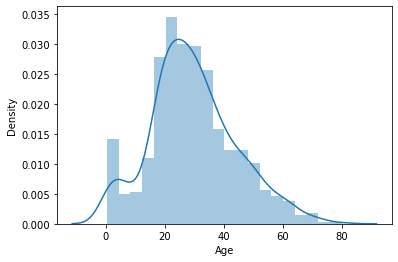

In [46]:
import seaborn as sns

sns.distplot(df['Age'].dropna())

- After dropping the null values, we can see the datapoints of Age features is almost normally distributed.

- Whenever we have normal distribution, we will be using 'Estimate Outliers (Extreme Value Analysis)' technique to handle the outliers.

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

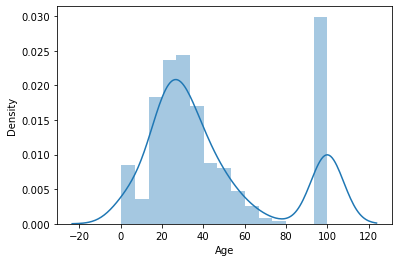

In [45]:
sns.distplot(df["Age"].fillna(100))

- At 100 we can now see the outliers are present.

## Detecting outliers from a gaussian distributed dataset

Text(0, 0.5, 'No of passengers')

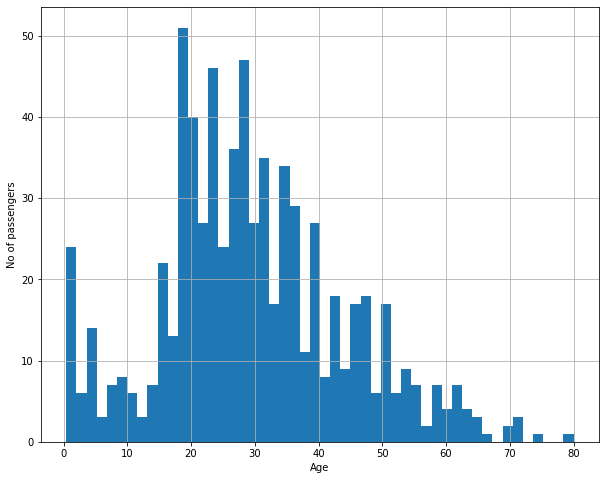

In [48]:
#Checking whether there is any outliers without filling the null values in 'Age' column
plt.figure(figsize = (10, 8))
figure = df.Age.hist(bins = 50)
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


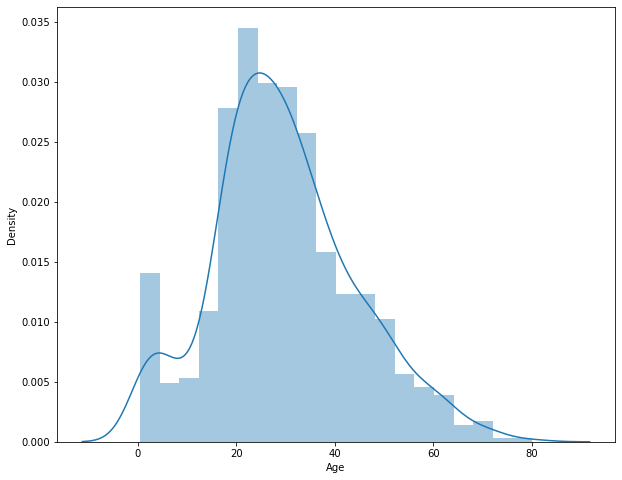

In [61]:
plt.figure(figsize = (10, 8))
sns.distplot(df["Age"])
plt.show()

- The data is almost normally distributed or Gaussian distributed.
- __To remove outliers from Gaussian distribution, we will apply '3 Standard Deviation'.__

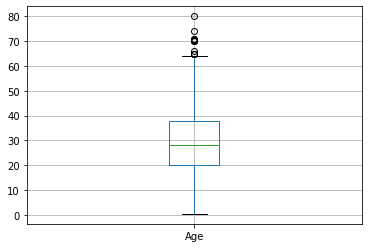

In [49]:
#drawing boxplot to check outliers present or not
figure = df.boxplot(column = 'Age')

- Here we can see the outliers present in the 'Age' column.

In [50]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
### Assuming Age follows a Gaussian Distribution we will calculate the boundaries which differentiates the outliers
upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()
lower_boundary, upper_boundary, df['Age'].mean()

(-13.88037434994331, 73.27860964406095, 29.69911764705882)

- __Whenever we have Gaussian distribution, we will be using + 3*standard deviation and - 3*standard deviation, to get the best boundary. Hence any age beyond 73 will be considered as outlier. z-score can also be applied for this.__

## Detecting outliers from a Skewed dataset

Text(0, 0.5, 'No of passengers')

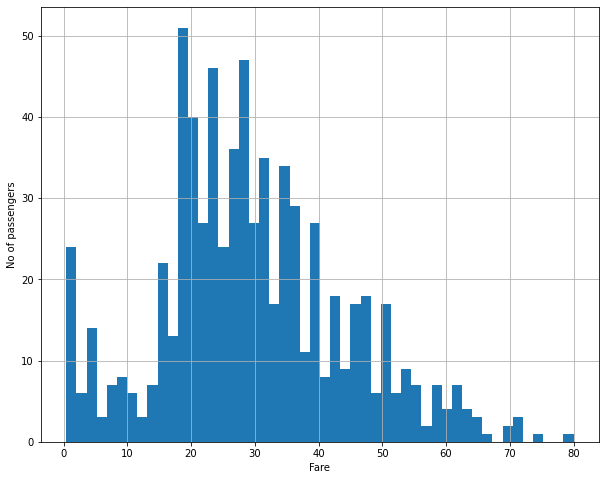

In [60]:
#Checking whether there is any outliers in 'Fare' column
plt.figure(figsize = (10, 8))
figure = df.Age.hist(bins = 50)
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


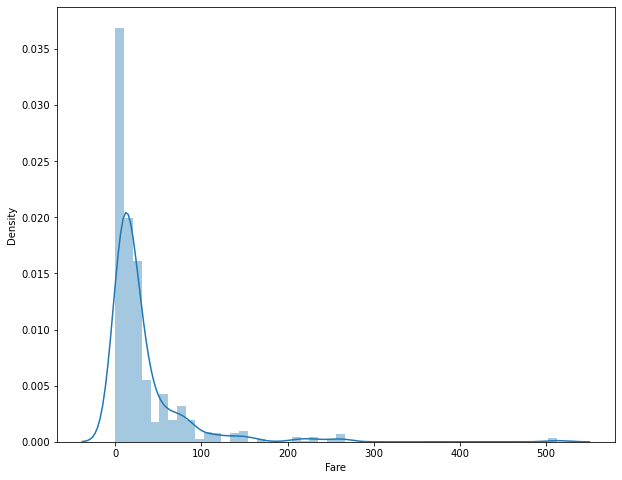

In [62]:
plt.figure(figsize = (10, 8))
sns.distplot(df['Fare'])
plt.show()

- Here we can see that the data is right skewed.

<AxesSubplot:>

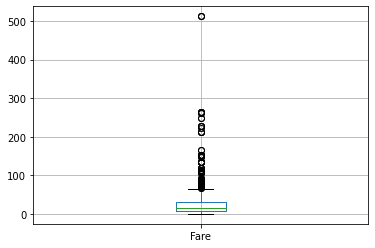

In [65]:
#drawing boxplot to visualize outliers
df.boxplot(column = 'Fare')

- We can see that there are huge number of outliers present in the dataset.

In [66]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [67]:
# interquantile range to calculate the boundaries to differentiates the outliers
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [69]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
lower_bridge, upper_bridge

(-26.724, 65.6344)

In [70]:
# extreme boundary to differentiate the outliers
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
lower_bridge, upper_bridge

(-61.358399999999996, 100.2688)

- __Whenever the data is skewed, we should use extreme boundary to find out the outliers. In this case any data point beyond 100 will be considered as outlier.__ 

## Replacing the outliers with another value

In [78]:
data = df.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
data[data['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [82]:
#replacing any Age above 73 with the value 73 which we got using 3*standard deviations
data.loc[data['Age'] >= 73, 'Age'] = 73
data[data['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


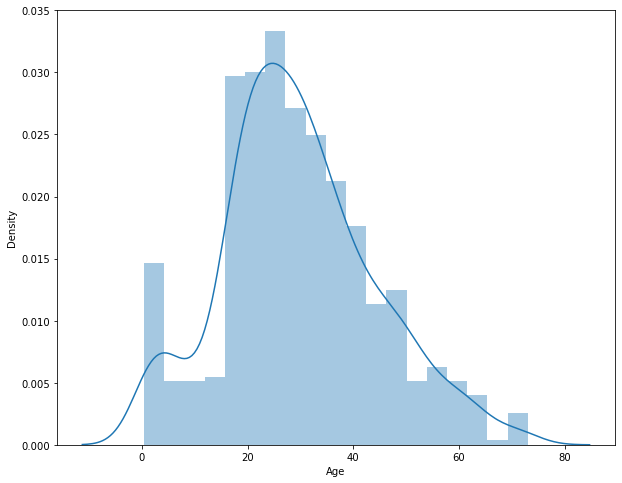

In [86]:
plt.figure(figsize = (10, 8))
sns.distplot(data['Age'])
plt.show()

In [83]:
#replacing any Fare above 100 with the value 100 which we got using extreme boundary
data.loc[data['Fare'] > 100, 'Fare'] = 100

In [84]:
data[data['Fare'] > 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


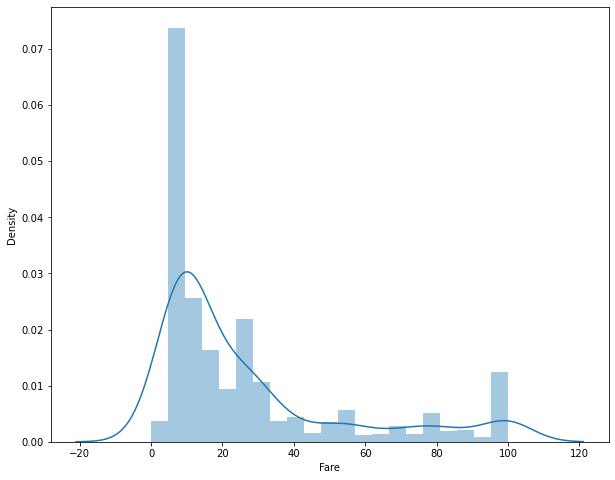

In [85]:
plt.figure(figsize = (10, 8))
sns.distplot(data['Fare'])
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size = 0.3)

In [91]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy Score : {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test, y_pred1[:, 1])))

Accuracy Score : 0.664179104477612
roc_auc_score : 0.648018648018648


In [94]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy Score : {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test, y_pred1[:, 1])))

Accuracy Score : 0.6492537313432836
roc_auc_score : 0.7003167772398542
